In [47]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [48]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [49]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


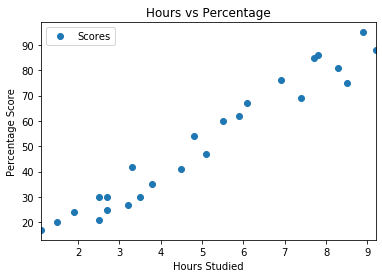

In [51]:
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [52]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [53]:
dataset.shape

(25, 2)

In [54]:
dataset.nunique()

Hours     23
Scores    23
dtype: int64

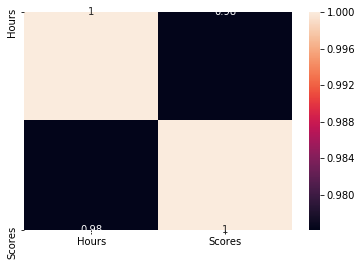

In [55]:
sns.heatmap(dataset.corr(),annot= True)

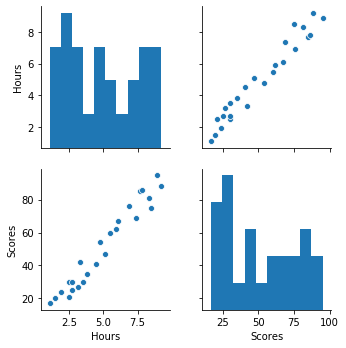

In [56]:
sns.pairplot(dataset)

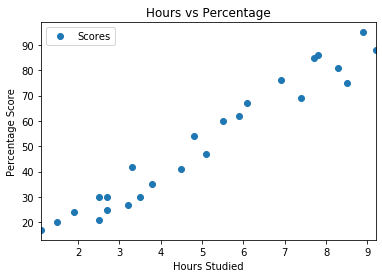

In [57]:
dataset.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

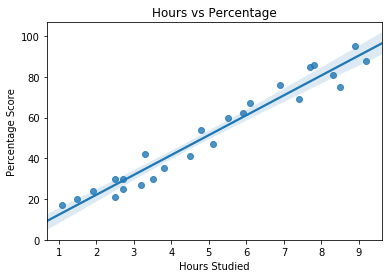

In [58]:
sns.regplot(x=dataset['Hours'],y=dataset['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [59]:
x = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

In [60]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [61]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [62]:
print('coefficient=',regressor.coef_)
print('intercept=',regressor.intercept_)

coefficient= [9.91065648]
intercept= 2.018160041434683


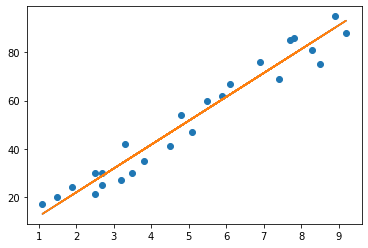

In [63]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x,line,label='regression line')
plt.plot(x, line);
plt.show()

In [64]:
print(x_test) 
y_pred = regressor.predict(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [65]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [66]:
print("Training Score",regressor.score(x_train,y_train))
print("Test Score",regressor.score(x_test,y_test))

Training Score 0.9515510725211553
Test Score 0.9454906892105356


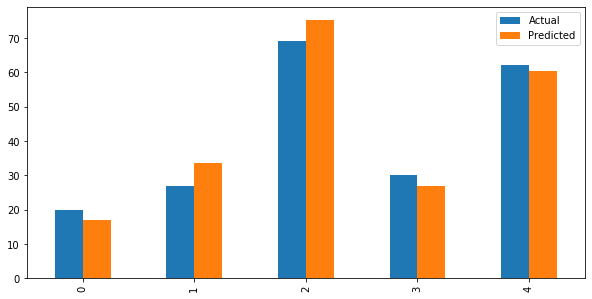

In [67]:
df.plot(kind='bar',figsize=(10,5))
plt.show()

In [68]:
hours = float(input('enter the Hours= '))
test=np.array([hours])
test=test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

enter the Hours= 9.25
No of Hours = 9.25
Predicted Score = 93.69173248737538


In [69]:
from sklearn import metrics
print('Mean Absolute Error= ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error= ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error= ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R^2:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error=  4.183859899002975
Mean Squared Error=  21.5987693072174
Root Mean Squared Error=  4.6474476121003665
R^2: 0.9454906892105356
